In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Modelo Presa-Predador

\begin{array}{lcl} 
\dot{x}(t) & = & 0.84x(t) - 0.27x(t)y(t) \\ 
\dot{y}(t) & = & -0.38y(t) + 0.25y(t)x(t)
\end{array}

Dados $x(0) = 3.5$ e $y(0) = 2.7$

# Euler Implícito

$x_{k+1} = x_{k} + \Delta f(t_{k+1}, x_{k+1})$
k = 0,1,2,...,n-1:

\begin{array}{lcl} 
t_{k+1} & = & t_{k} + \Delta t \\ 
X_{k+1} & \leftarrow & RESOLVEX[X - X_{k} - \Delta t f(t_{k+1}, X) = 0]
\end{array}

# Newton

$$
J(X_{k+1}^{[j]})\Delta X^{[j+1]} = - g(X_{k+1}^{[j]})
$$

A melhor aproximação para $X_{k+1}^{[0]}$ é $X_{k}$

# A Solução

Vamos integrar a função em $[0,1]$.

$t_{0} = 0$ e $t_{f} = 1$

In [23]:
#esse par (x, y) representa (x_{k+1}^{[j+1]}, y_{k+1}^{[j+1]}), que é conhecido no momento da iteração

def g1(x, y, xk, alpha1, beta1, delta):
    return x - xk - delta*(alpha1*x - beta1*x*y)

def g2(x, y, yk, alpha2, beta2, delta):
    return y - yk - delta*(-alpha2*y + beta2*x*y)

def g(x, y, xk, yk, alpha1, beta1, alpha2, beta2, delta):
    return np.array([g1(x, y, xk, alpha1, beta1, delta), g2(x, y, yk, alpha2, beta2, delta)])

In [21]:
#Possível Evolução: Jg específica -> Jg genérica

def Jg(x, y, alpha1, beta1, alpha2, beta2, delta):
    linha1 = [1 - delta*(alpha1 - beta1*y), delta*beta1*x]
    linha2 = [-delta*beta2*y, 1 - delta*(-alpha2 + beta2*x)]
    return np.array([linha1, linha2])

### Parâmetros do Modelo

In [9]:
a1, b1, a2, b2 = 0.84, 0.27, 0.38, 0.25 

In [11]:
x0, y0 = 3.5, 2.7

### Testes

In [14]:
Jg(x0, y0, a1, b1, a2, b2, 0.1)

array([[ 0.9889,  0.0945],
       [-0.0675,  0.9505]])

In [16]:
g(x0, y0, x0, y0, a1, b1, a2, b2, 0.1)

array([-0.03885, -0.13365])

In [17]:
np.linalg.solve(Jg(x0, y0, a1, b1, a2, b2, 0.1), g(x0, y0, x0, y0, a1, b1, a2, b2, 0.1))

array([-0.02567502, -0.14243352])

In [18]:
np.array([x0, y0]) + np.linalg.solve(Jg(x0, y0, a1, b1, a2, b2, 0.1), g(x0, y0, x0, y0, a1, b1, a2, b2, 0.1))

array([3.47432498, 2.55756648])

### O Modelo

In [19]:
"""
Qual critério de parada para newton2D????????????????????????????????????????
"""

'\nQual critério de parada para newton2D????????????????????????????????????????\n'

In [25]:
#Evolução c. parada: SEM critério de parada -> critério de parada dummy -> critério de parada decente
#X = X_{k+1}^{[j]}

#Note que esse newton não recebe nem Jg nem g, mas usa os globais. Evolução: funcoes globais -> funcoes locais (reaproveitamento de codgo)
def newton2D(x, y, xk, yk, delta):
    deltaX = np.linalg.solve(Jg(x, y, a1, b1, a2, b2, delta), g(x, y, xk, yk, a1, b1, a2, b2, delta))
    return np.array([x, y]) + deltaX

In [126]:
# Resolve com o g global, o f é inútil(por enquanto, n deveria ser, ideal é usar o local pra isolar a função)
def euler_implicito(t0, tf, n, X0, RESOLVEX, f):
    h = (tf - t0)/n
    t = t0
    T = [t]
    X_t = [X0]
    for k in range(n):
        t = t + h
        T.append(t)
        Xk = X_t[len(X_t) - 1]
        #para enfatizar que essa variável é o X_{k+1}^{[0]}
        Xk_pp_inicial = Xk
        X_ = RESOLVEX(Xk_pp_inicial[0], Xk_pp_inicial[1], Xk[0], Xk[1], h)
        X_t.append(X_)
    return T, X_t

VARIE OS PARÂMETROS ABAIXO

In [141]:
n = 10000
t0 = 0
tf = 30

In [142]:
T_r, X_r = euler_implicito(t0, tf, n, np.array([x0, y0]), newton2D, g)

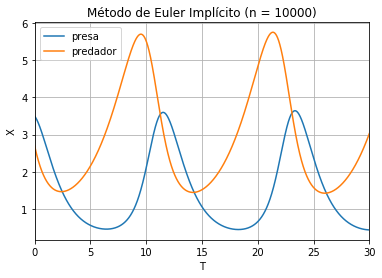

In [143]:
plt.figure()
X_r = np.array(X_r)
# Plotar as componentes de x

plt.plot(T_r, X_r.T[0], label = 'presa')
plt.plot(T_r, X_r.T[1], label = 'predador')
  
# Rotulos dos eixos
plt.xlabel('T')
plt.ylabel('X')

# Titulo do grafico
plt.title('Método de Euler Implícito (n = %d)'%(n))

# Alterar limites inferior e superior do eixo x (use ylim para eixo y)
plt.xlim([ t0, tf ])

plt.grid(True) # Mostrar linhas de grade
plt.legend() # Mostrar legenda
plt.show() # Mostrar grafico

# Euler Explícito (EXPERIMENTO PRÉ-TRAPÉZIO)

In [129]:
def F(x, y, alpha1, beta1, alpha2, beta2):
    linha1 = x*(alpha1 - beta1*y)
    linha2 = y*(-alpha2 + beta2*x)
    return np.array([linha1, linha2])

In [131]:
def euler_explicito(t0, tf, n, X0):
    h = (tf - t0)/n
    t = t0
    T = [t]
    X_t = [X0]
    for k in range(n):
        t = t + h
        T.append(t)
        Xk = X_t[len(X_t) - 1]
        X_ = Xk + h*F(Xk[0], Xk[1], a1, b1, a2, b2)
        X_t.append(X_)
    return T, X_t

Vamos comparar as dinâmicas para passos diferentes de euler explícito

In [150]:
tf = 300
n = 100000

In [151]:
T, X = euler_explicito(t0, tf, n, np.array([x0, y0]))

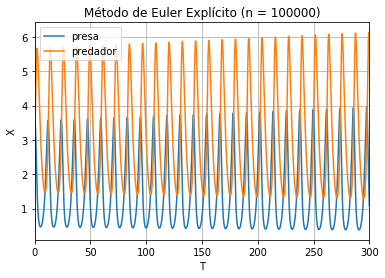

In [152]:
plt.figure()
X = np.array(X)
# Plotar as componentes de x

plt.plot(T, X.T[0], label = 'presa')
plt.plot(T, X.T[1], label = 'predador')
  
# Rotulos dos eixos
plt.xlabel('T')
plt.ylabel('X')

# Titulo do grafico
plt.title('Método de Euler Explícito (n = %d)'%(n))

# Alterar limites inferior e superior do eixo x (use ylim para eixo y)
plt.xlim([ t0, tf ])

plt.grid(True) # Mostrar linhas de grade
plt.legend() # Mostrar legenda
plt.show() # Mostrar grafico

In [153]:
tf = 300
n = 10000

In [154]:
T, X = euler_explicito(t0, tf, n, np.array([x0, y0]))

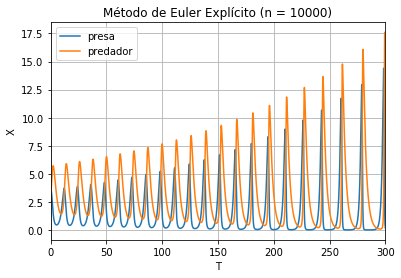

In [155]:
plt.figure()
X = np.array(X)
# Plotar as componentes de x

plt.plot(T, X.T[0], label = 'presa')
plt.plot(T, X.T[1], label = 'predador')
  
# Rotulos dos eixos
plt.xlabel('T')
plt.ylabel('X')

# Titulo do grafico
plt.title('Método de Euler Explícito (n = %d)'%(n))

# Alterar limites inferior e superior do eixo x (use ylim para eixo y)
plt.xlim([ t0, tf ])

plt.grid(True) # Mostrar linhas de grade
plt.legend() # Mostrar legenda
plt.show() # Mostrar grafico

Aparentemente, quando o passo de integração $\Delta t$ não é pequeno o suficiente, as populações explodem.